In [ ]:
import pandas as pd


In [8]:
data = pd.read_csv("covtype.csv")

In [9]:
data.info()
data.head()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56738 entries, 0 to 56737
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Elevation                           56738 non-null  int64  
 1   Aspect                              56738 non-null  int64  
 2   Slope                               56738 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    56738 non-null  int64  
 4   Vertical_Distance_To_Hydrology      56738 non-null  int64  
 5   Horizontal_Distance_To_Roadways     56738 non-null  int64  
 6   Hillshade_9am                       56738 non-null  int64  
 7   Hillshade_Noon                      56738 non-null  int64  
 8   Hillshade_3pm                       56738 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  56738 non-null  int64  
 10  Wilderness_Area1                    56738 non-null  int64  
 11  Wilderness_Area2                    56738

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


In [13]:
data.fillna(method='ffill', inplace=True)


<ipython-input-13-093999af67fe>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Example of filling missing values


In [16]:
data.drop(columns=['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'], inplace=True)


In [17]:
data = pd.get_dummies(data, drop_first=True)


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('Cover_Type', axis=1))


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data['Cover_Type'], test_size=0.2)


In [21]:
correlation_matrix = data.corr()


In [22]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [23]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [24]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)


RandomForestClassifier()

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)


KNeighborsClassifier()

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_lr = model_lr.predict(X_test)
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))


Logistic Regression - Accuracy: 0.7922100810715544
Precision: 0.7865769542212657
Recall: 0.7922100810715544
F1 Score: 0.7807595557720948


In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30]}
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 30, 'n_estimators': 100}


In [28]:
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_knn = model_knn.predict(X_test)

# Decision Tree
print("Decision Tree - Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_dt, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))

# Random Forest
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))

# K-Nearest Neighbors
print("KNN - Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))


Decision Tree - Accuracy: 0.9132886852308777
Precision: 0.9134054124923751
Recall: 0.9132886852308777
F1 Score: 0.9133396306207188
Random Forest - Accuracy: 0.9378745153330983
Precision: 0.9384912265466878
Recall: 0.9378745153330983
F1 Score: 0.9379006262203945
KNN - Accuracy: 0.8864117025026437
Precision: 0.8858768832654282
Recall: 0.8864117025026437
F1 Score: 0.8858084475211649


In [29]:
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(estimator=model_knn, param_grid=param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
print("Best parameters for KNN:", grid_search_knn.best_params_)


Best parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}


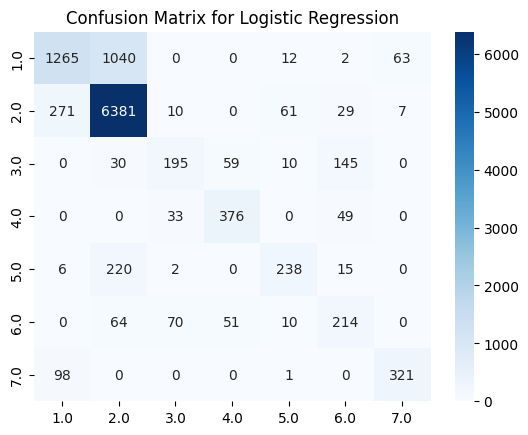

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=model_lr.classes_, yticklabels=model_lr.classes_)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


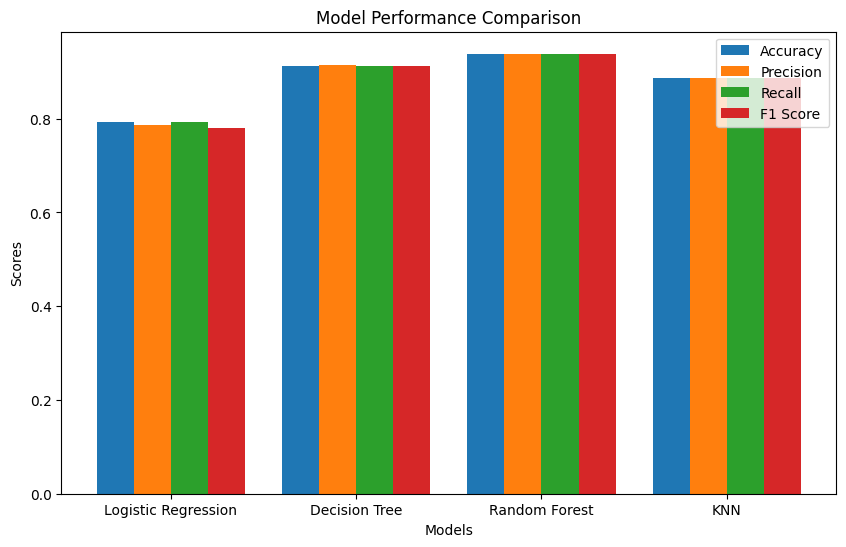

In [31]:
import matplotlib.pyplot as plt

# نتائج النماذج
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN']
accuracies = [0.7922, 0.9133, 0.9379, 0.8864]
precisions = [0.7866, 0.9134, 0.9385, 0.8859]
recalls = [0.7922, 0.9133, 0.9379, 0.8864]
f1_scores = [0.7808, 0.9133, 0.9379, 0.8858]

# رسم النتائج
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = range(len(models))

bar1 = ax.bar(index, accuracies, bar_width, label='Accuracy')
bar2 = ax.bar([i + bar_width for i in index], precisions, bar_width, label='Precision')
bar3 = ax.bar([i + 2 * bar_width for i in index], recalls, bar_width, label='Recall')
bar4 = ax.bar([i + 3 * bar_width for i in index], f1_scores, bar_width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks([i + 1.5 * bar_width for i in index])
ax.set_xticklabels(models)
ax.legend()

plt.show()
